In [1]:
import numpy as np
import pandas as pd
#import pygeostat as gs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import subprocess as sp
%pylab inline --no-import-all
from subprocess import check_output
# import tensorflow as tf
# from tensorflow.python import debug as tf_debug
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn import preprocessing
import scipy.spatial as scs
import scipy as sc
import math
from scipy.spatial import distance
from sklearn.metrics import mean_squared_error
import time
from sklearn.metrics import r2_score
from random import randrange
from IPython.display import clear_output
from scipy.ndimage import gaussian_filter
import h5py
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
# from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle
import random
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import random_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import torch
import torchvision
import numpy as np
from torchvision import transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from tqdm import tqdm
from torchvision.utils import save_image
import torchvision.transforms as transforms

In [3]:
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [4]:
# Set random seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

In [5]:
class_names = ['3001_Breccia', '3002_IHS', '3003_Other', '3004_Sand']
class_to_index = {class_name: index for index, class_name in enumerate(class_names)}

# Create empty lists to store the class information
class_index_list = []
class_name_list = []
class_label_list = []

# Iterate over the class names and retrieve the corresponding index and label
for class_name in class_names:
    class_index = class_to_index[class_name]
    class_label = class_name[:4]  # get the first 4 characters of the class name as label
    class_index_list.append(class_index)
    class_name_list.append(class_name)
    class_label_list.append(class_label)

# Print the class information
for i in range(len(class_index_list)):
    print(f"Class Index: {class_index_list[i]}, Class Name: {class_name_list[i]}, Class Label: {class_label_list[i]}")

Class Index: 0, Class Name: 3001_Breccia, Class Label: 3001
Class Index: 1, Class Name: 3002_IHS, Class Label: 3002
Class Index: 2, Class Name: 3003_Other, Class Label: 3003
Class Index: 3, Class Name: 3004_Sand, Class Label: 3004


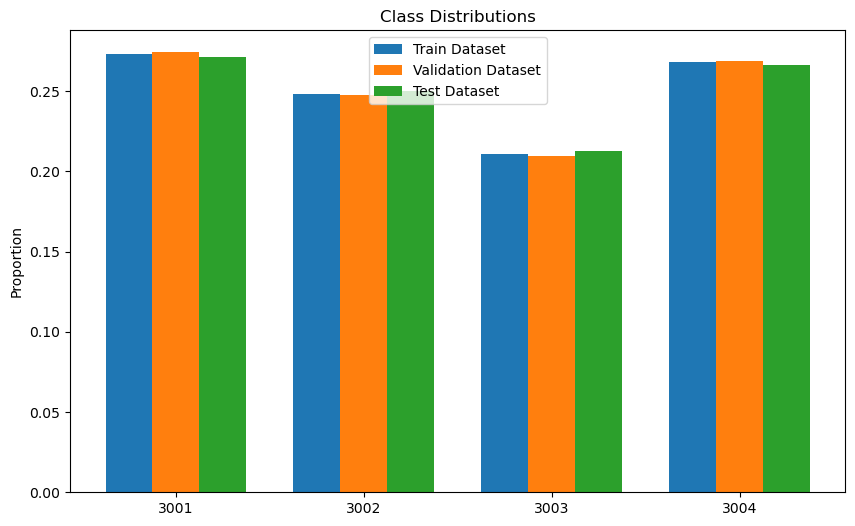

In [15]:
# Check if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

current_directory = os.getcwd()

# Define the directories for train, validation, and test datasets
train_data_dir = os.path.normpath(os.path.join(current_directory,'Dataset_3', 'train'))
train_data_dir = os.path.normpath(os.path.join(current_directory,'Dataset_3', 'val'))
train_data_dir = os.path.normpath(os.path.join(current_directory,'Dataset_3', 'test'))

# Define the transformation to convert the images to tensors
to_tensor = transforms.ToTensor()

# Function to calculate class distributions
def calculate_class_proportions(data_dir):
    dataset = datasets.ImageFolder(data_dir, transform=to_tensor)

    # Calculate class counts
    class_counts = np.bincount(dataset.targets)

    # Normalize class counts to obtain class proportions
    class_proportions = class_counts / np.sum(class_counts)

    return class_proportions

# Calculate class proportions for the train, validation, and test datasets
train_proportions = calculate_class_proportions(train_data_dir)
val_proportions = calculate_class_proportions(val_data_dir)
test_proportions = calculate_class_proportions(test_data_dir)

# Plot class distributions
num_classes = len(train_proportions)
x = np.arange(num_classes)
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, train_proportions, width, label="Train Dataset")
rects2 = ax.bar(x, val_proportions, width, label="Validation Dataset")
rects3 = ax.bar(x + width, test_proportions, width, label="Test Dataset")

ax.set_ylabel('Proportion')
ax.set_title('Class Distributions')
ax.set_xticks(x)
ax.set_xticklabels(class_label_list)
ax.legend()
plt.savefig("D3 CD.png")


plt.show()
